In [33]:
from keras.datasets import mnist 
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt # import pyplot alias plt for plotting 
from sklearn.metrics import confusion_matrix 
import seaborn as sn
from keras.layers import Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten
import numpy as np

# Load datatset, preprocessing

In [20]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
input_dim = (28,28,1) 
X_train = X_train.reshape(60000, input_dim) #28,28,1
X_test = X_test.reshape(10000, input_dim) #28,28,1
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [23]:
output_dim = nb_classes = 10

In [24]:
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)

# CNN model in Keras


In [25]:
model = Sequential() # Sequential model
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) 
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2))) 

model.add(Convolution2D(10, 1, activation='relu')) 

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
 
model.add(Convolution2D(10, 5)) 

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

C:\Users\avadhut.c\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\avadhut.c\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
C:\Users\avadhut.c\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 10)        170       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        2912      
__________

# Model Training

In [26]:
batch_size = 128 
nb_epoch = 100
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

C:\Users\avadhut.c\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 23s 383us/step - loss: 0.4096 - acc: 0.8779 - val_loss: 0.1547 - val_acc: 0.9556
Epoch 2/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.1386 - acc: 0.9585 - val_loss: 0.1097 - val_acc: 0.9671
Epoch 3/100
60000/60000 [==============================] - 19s 320us/step - loss: 0.1049 - acc: 0.9688 - val_loss: 0.0869 - val_acc: 0.9743
Epoch 4/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.0872 - acc: 0.9736 - val_loss: 0.0772 - val_acc: 0.9756
Epoch 5/100
60000/60000 [==============================] - 19s 320us/step - loss: 0.0765 - acc: 0.9768 - val_loss: 0.0651 - val_acc: 0.9788
Epoch 6/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0688 - acc: 0.9792 - val_loss: 0.0617 - val_acc: 0.9794
Epoch 7/100
60000/60000 [==============================] - 20s 335us/step - loss: 0.0632 - acc: 0.9811 - val_l

Epoch 59/100
60000/60000 [==============================] - 20s 335us/step - loss: 0.0126 - acc: 0.9968 - val_loss: 0.0413 - val_acc: 0.9868
Epoch 60/100
60000/60000 [==============================] - 19s 318us/step - loss: 0.0120 - acc: 0.9969 - val_loss: 0.0448 - val_acc: 0.9855
Epoch 61/100
60000/60000 [==============================] - 20s 332us/step - loss: 0.0121 - acc: 0.9969 - val_loss: 0.0402 - val_acc: 0.9870
Epoch 62/100
60000/60000 [==============================] - 20s 335us/step - loss: 0.0113 - acc: 0.9973 - val_loss: 0.0440 - val_acc: 0.9858
Epoch 63/100
60000/60000 [==============================] - 19s 321us/step - loss: 0.0115 - acc: 0.9971 - val_loss: 0.0439 - val_acc: 0.9855
Epoch 64/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.0111 - acc: 0.9974 - val_loss: 0.0417 - val_acc: 0.9875
Epoch 65/100
60000/60000 [==============================] - 19s 324us/step - loss: 0.0106 - acc: 0.9977 - val_loss: 0.0427 - val_acc: 0.9860
Epoch 66/100


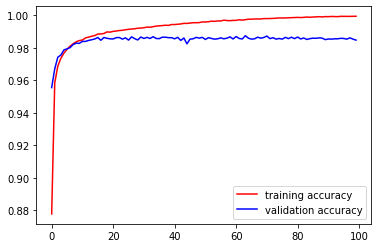

In [27]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

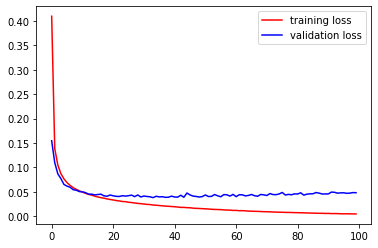

In [28]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

# Inference 

In [29]:
predictions = model.predict_classes(X_test)

In [30]:
predictions[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [34]:
np.argmax(Y_test[0])

7

In [35]:
y_test = np.argmax(Y_test, axis=1)

In [36]:
Y_test.shape

(10000, 10)

In [37]:
y_test.shape

(10000,)

# Misclassified Images

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

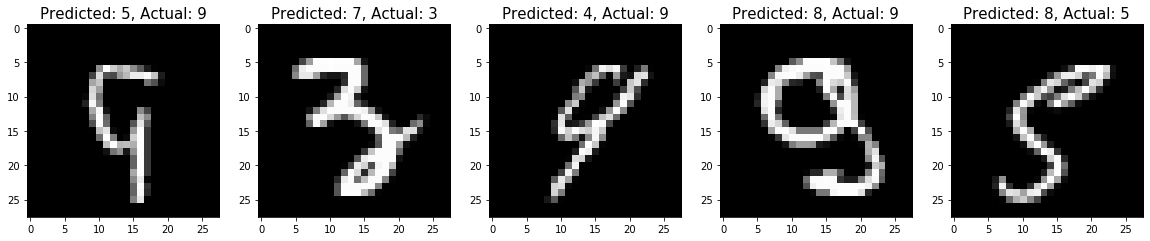

In [39]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

# Confusion Matrix

In [40]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


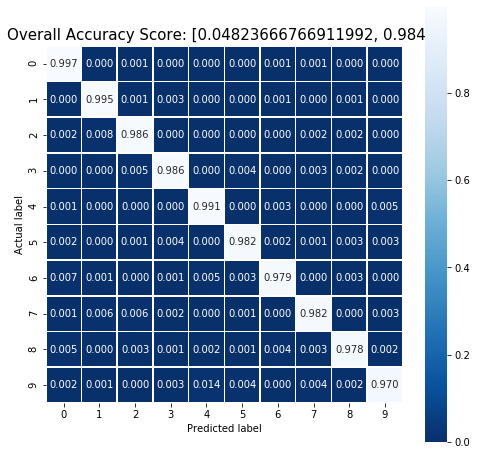

In [41]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

In [44]:
 model.layers[0].get_weights()[0][:, :, 0, :].shape

(3, 3, 8)

In [52]:
model.layers[2].get_weights()[0].shape

(3, 3, 8, 16)

# Visualize Kernels

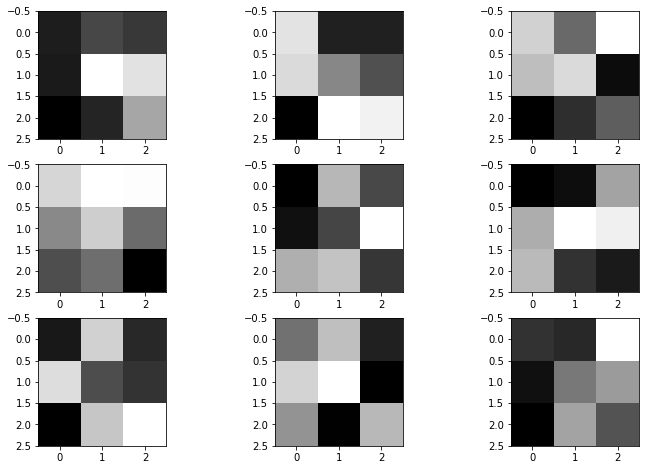

In [53]:
#get_weights [x, y, channel, nth convolution layer]
weight_conv2d_1 = model.layers[2].get_weights()[0][:, :, 0, :]
col_size = 3
row_size = 3
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
    for col in range(0,col_size):
        ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
        filter_index += 1

# Test a random image

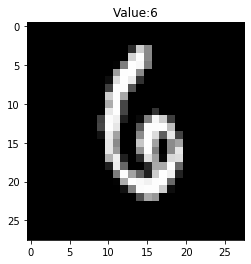

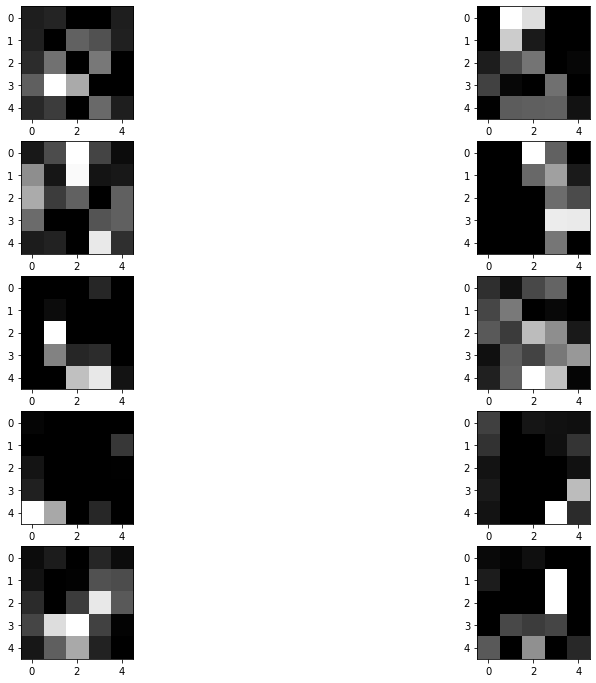

In [61]:
img_no = 12002
test_img = X_train[img_no]
plt.imshow(test_img.reshape(28, 28), cmap='gray')
plt.title("Value:{}".format(y_train[img_no]) )
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs = model.input, outputs=layer_outputs)
activations = activation_model.predict(test_img.reshape(1, 28, 28, 1))

def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(15,12))
    
    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
      
#display_activation(activations, 4, 8, 6)
display_activation(activations, 2, 5, 8)